<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/cifarimageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers


In [2]:
#mounting google drive to access files
#accessing data from google drive
#from google.colab import drive
#drive.mount('/content/drive')
#accessing zipped file
#from zipfile import ZipFile
#filename="/content/drive/MyDrive/coronaimage.zip"
#with ZipFile(filename,'r') as zip:
#  zip.extractall()
#  print('finish')


Mounted at /content/drive


In [49]:
# The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. **
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [39]:

 #Normalize pixel values, encoding labels
#train_images, test_images = (train_images / 255.0)-0.5, (test_images / 255.0)-0.5
#train_labels=tf.keras.utils.to_categorical(train_labels)
#test_labels=tf.keras.utils.to_categorical(test_labels)
#test_labels[0][0]


(50000, 32, 32, 3)


In [50]:
#checking image shape
tst_image=train_images[14]
tst_img1=image.img_to_array(tst_image)
tst_img1.reshape((1,)+tst_img1.shape)
tst_img1.shape


(32, 32, 3)

In [56]:
#CNN Model for classification, Adding Conv, Pooling and flattening layer
opt=optimizers.Adagrad(learning_rate=0.001)
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=128,padding='same',kernel_size=(3,3),strides=(1,1),input_shape=(32,32,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
#cnn_model.add(Dropout(rate=0.2))
#adding FC layer and dense layer
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128,activation='relu'))
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Dense(units=256,activation='relu'))
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Dense(units=128,activation='relu'))
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Dense(units=10,activation='softmax'))
print(cnn_model.summary())
#compiling the model

cnn_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 4, 4, 64)        

In [57]:
# Image Augmentation to avoid Overfitting (Transformed zoomed rotated scaled images - generator)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest',rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)
train_data = train_datagen.flow(train_images,train_labels, batch_size=32)
test_data=test_datagen.flow(test_images,test_labels,batch_size=32)



In [58]:
#fitting model
cnn_model.fit_generator(train_data,epochs=200,steps_per_epoch=7000,validation_steps= 2000,shuffle=True,validation_data=test_data)
cnn_model.save_weights('first_try.h5')  # always save your weights after tining or during training


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
1563/7000 [=====>........................] - ETA: 16:23 - loss: 189001859072.0000 - accuracy: 0.7210WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1400000 batches). You may need to use the repeat() function when building your dataset.


313/313 - 2s - loss: 0.8608 - accuracy: 0.7102


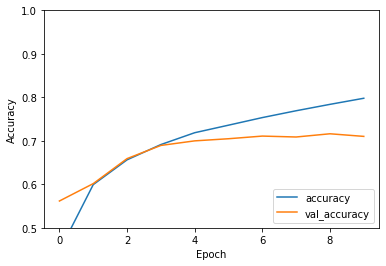

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7102000117301941
